In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
from wordcloud import WordCloud

DATA_NAME = "/content/teknofest_train_final.csv"
VISUALIZE_WORDCLOUD = True

stop_words = list(set(stopwords.words('turkish')))
additional_stopwords = ["ne","de","bir","sen","bu","bir","ve","gibi"]
stop_words.extend(additional_stopwords)

def remove_stopwords(text:str, 
                     ) -> str:
    
    text_split = text.split()
    removed_stopwords_text = [word for word in text_split if word not in stop_words]
    return " ".join(removed_stopwords_text)


def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:

    print("Number of rows before preprocessing: ", df.shape[0])
    df = df[df.text.str.len() > 3] # Bazı bozuk datalar vardı, onları filtreledik.
    df = df.drop_duplicates(subset=["text","target","is_offensive"])

    df['text'] = df['text'].apply(lambda x:x.lower())
    #df['text'] = df['text'].apply(lambda x:remove_stopwords(x))
    df['text'] = df['text'].apply(lambda x:x.translate(str.maketrans('', '', string.punctuation)))
    
    print("Number of rows after preprocessing: ", df.shape[0])

    return df

def plot_wordcloud_per_category(df: pd.DataFrame
                                ) -> None:

  categories = df['target'].unique()  # kategorileri belirle

  for category in categories:
      print("-"*100)
      print("Category: ", category)
      print("-"*100)
      
      text = ' '.join(df[df['target'] == category]['text'].tolist())
      wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  #stopwords = set(stopwords.words('english')), 
                  min_font_size = 10).generate(text) 
                          
      # plot the WordCloud image                        
      plt.figure(figsize = (8, 8), facecolor = None) 
      plt.imshow(wordcloud) 
      plt.axis("off") 
      plt.tight_layout(pad = 0) 
        
      plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv(DATA_NAME, sep="|")
df.shape

(12617, 4)

In [ ]:
df = preprocess_data(df)
df = df.reset_index(drop=True)

Number of rows before preprocessing:  12617
Number of rows after preprocessing:  12461


In [ ]:
df.is_offensive.value_counts()

1    8939
0    3522
Name: is_offensive, dtype: int64

In [ ]:
df.target.value_counts()

OTHER        3578
INSULT       2393
PROFANITY    2376
SEXIST       2081
RACIST       2033
Name: target, dtype: int64

In [ ]:
3616-3599

17

In [ ]:
df[(df.is_offensive == 1) &(df.target == "OTHER")].shape

(72, 4)

In [ ]:
df[df.is_offensive == 0].target.value_counts()

OTHER        3544
RACIST         18
SEXIST         13
PROFANITY      12
INSULT         12
Name: target, dtype: int64

In [ ]:
df[(df.is_offensive == 0) &(df.target == "INSULT")]

,id,text,is_offensive,target
12365,a9cc6262-f3e3-4f63-ae92-de7c138f436c,e,0,INSULT
12374,5a714c91-4f34-4335-9e4f-b24eb506d11c,v,0,INSULT
12375,b255669c-2e65-4841-b2bb-9d78d5284912,g,0,INSULT
12427,824664a2-81f2-41ac-9cd6-e4c53c622485,p,0,INSULT
12429,7e470d31-13eb-47f0-99ad-97d3b548b3f2,k,0,INSULT
12431,760e09a4-23bc-4b55-b51c-3713316de58a,,0,INSULT
12436,49bf1f5a-5808-47d9-ba64-a762db7e8e75,,0,INSULT
12441,0d131c62-63ed-4c65-9424-ca5d9064a3e3,p,0,INSULT
12445,f22bc150-642c-42d8-b10a-d8edd0c3b91c,e,0,INSULT
12450,131cc8c0-53f3-419c-aba4-7e68780f3f29,,0,INSULT


----------------------------------------------------------------------------------------------------
Category:  INSULT
----------------------------------------------------------------------------------------------------


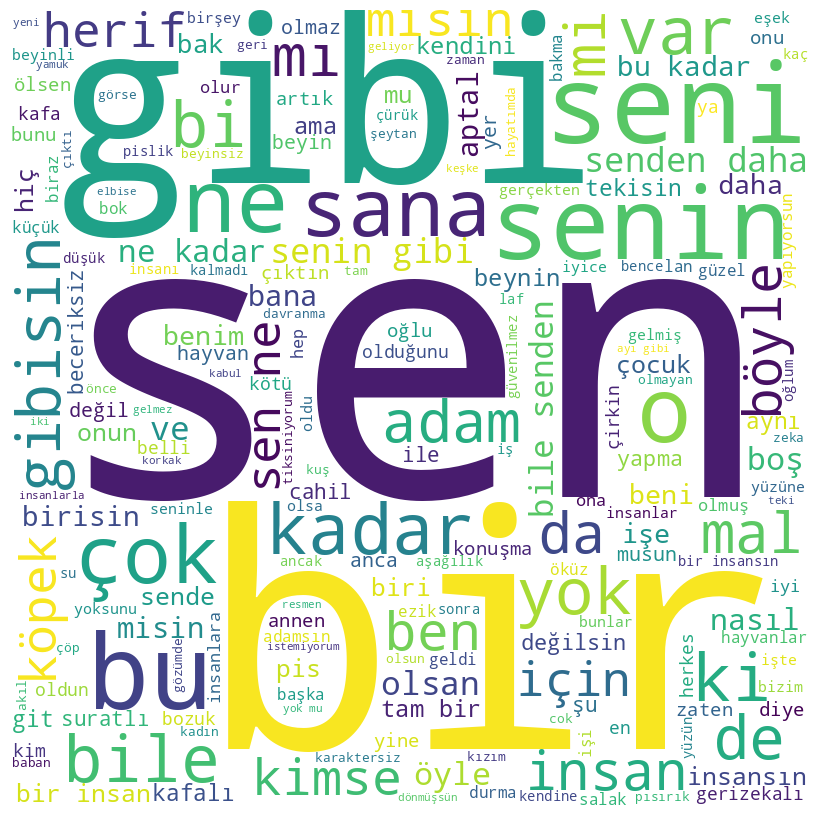

----------------------------------------------------------------------------------------------------
Category:  RACIST
----------------------------------------------------------------------------------------------------


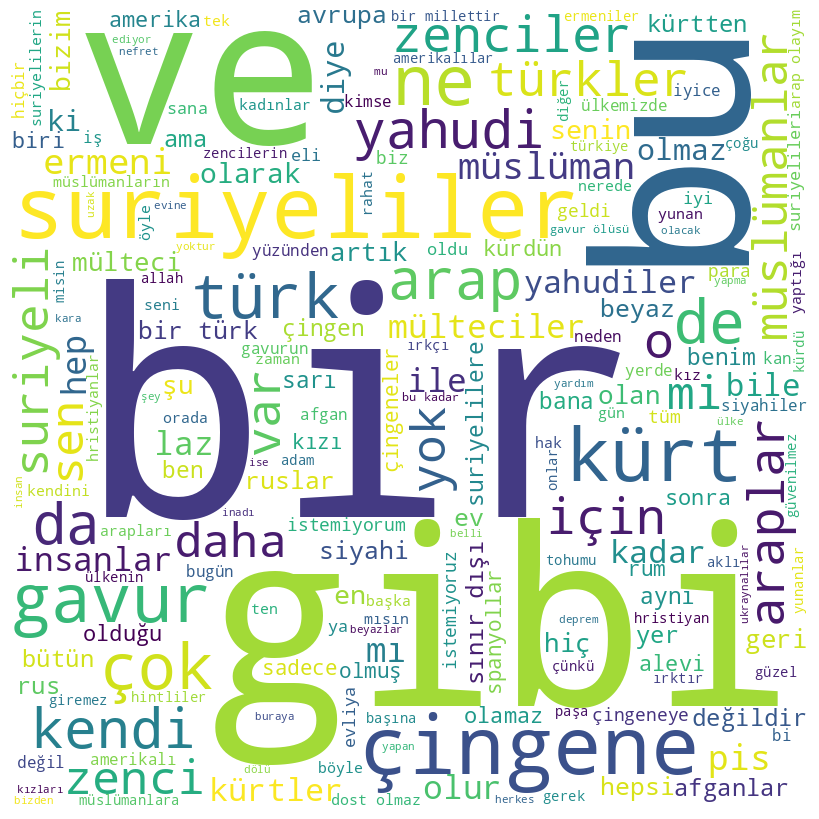

----------------------------------------------------------------------------------------------------
Category:  SEXIST
----------------------------------------------------------------------------------------------------


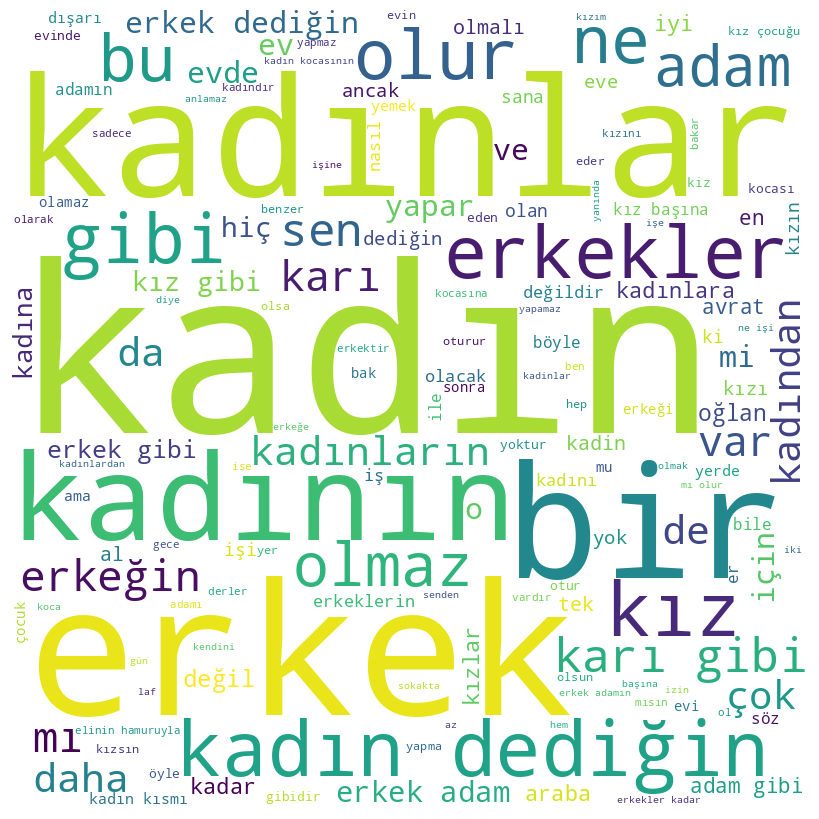

----------------------------------------------------------------------------------------------------
Category:  PROFANITY
----------------------------------------------------------------------------------------------------


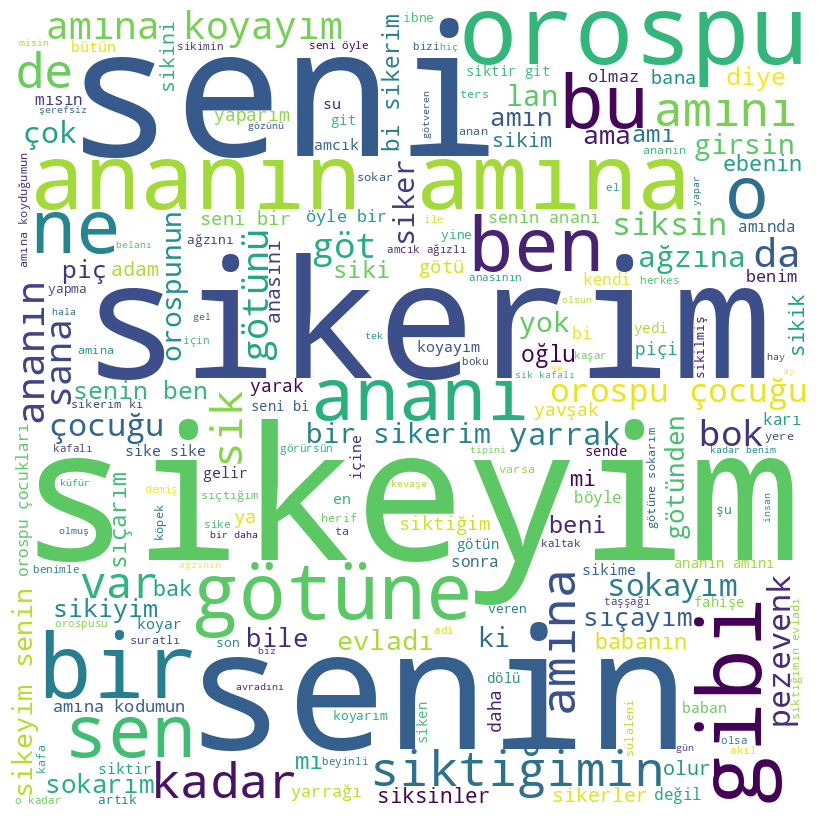

----------------------------------------------------------------------------------------------------
Category:  OTHER
----------------------------------------------------------------------------------------------------


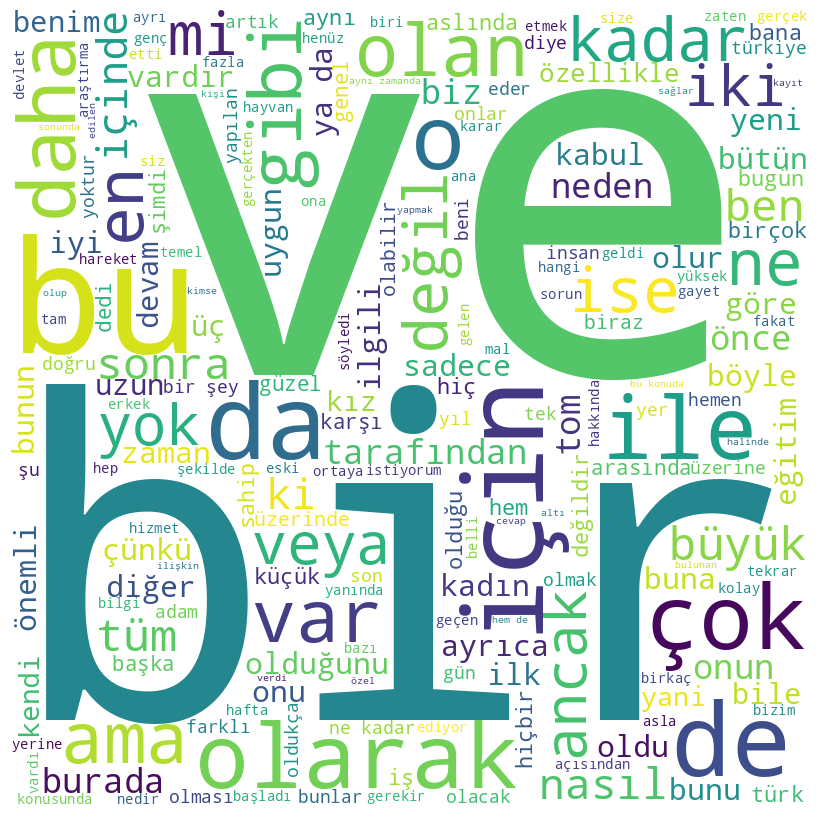

In [ ]:
if VISUALIZE_WORDCLOUD:
  plot_wordcloud_per_category(df)

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(df, df['target'])):
    df.loc[test_idx, 'kfold'] = fold

df['kfold'] = df['kfold'].astype(int)

In [ ]:
df[df.text.str.contains("defol")]

,id,text,is_offensive,target,kfold
706,b7cc91ca-b8a9-4e44-979a-fd28b4505335,defol burdan lan,1,PROFANITY,4
1559,6acfb60a-2370-4979-a47d-f086595facb1,suriyeliler afganlar hepsi defolsun gitsin,1,RACIST,1
1652,5faee149-3628-4008-9351-1a69461d371e,senden nefret ediyorum defolup gittin,1,INSULT,2
3594,eaeeaa16-3cfc-496c-b54a-15c8fb4a884b,afgani da suriyelisi de pakistanlisi da aynihe...,1,RACIST,1
3928,3e69d8e8-f04b-4a42-ae34-be52ed85ed45,nankör köpekler çok bi̇le durdular ülkemi̇zde ...,1,RACIST,3
4277,fffdb281-a555-4f7c-9f77-cc59ad96ab03,bebeğinden çocuğundan yaşlısına kadar tüm suri...,1,RACIST,0
4469,5c6a2af1-3a5b-42dc-b658-f4ceb3ca84e2,ülkemde suriyeli istemiyorum defolup gitsinler,1,RACIST,4
5206,c791dc4e-c5ad-4d07-829e-81d1ba5a410c,çabuk defol buradan gözüm görmesin seni köpek,1,INSULT,4
5781,372e16e4-b628-42de-8cc8-c2c950c6039c,artık suriyelilerin defolup gitme zamanı geldi,1,RACIST,1
7285,c7e22dd5-72f1-47fb-bb45-0e74e437e98d,defolu ürün gibi çıktın,1,INSULT,4


In [ ]:
df[df.text.str.contains("siyah")]["text"].tolist()

['amerikan toplumunda siyahlar daha ırkçı ve çok daha saldırgan',
 'siyahi atlete birincilik ödülü verilirken eli sıkılmak istenmedi',
 '2 milyon suriyeli yerine bu 10 milyon siyahi insanların gelmesine razıyım',
 'siyah insanlarla beyaz insanlar tabiki de bir olamaz',
 'orada siyah afrikalılardan leş gibi iğrenç kokuyorlar falan diye bahsediyordu beyaz köle tacirleri',
 'açıkçası çoğu hayvan siyahlardan nefret eder',
 'elektrik tellerinin bahçe tellerinin üstü yüzlerce simsiyah kargayla dolmuştu',
 'siyahi bir adamın yanından geçerken çantanızı kollayın',
 'siyahlar koşuda beyazlardan daha iyidir',
 'bir siyahi ile bir beyaz evlenemez',
 'oyunda siyah bir sabahlık giymiş olan yaşlı bir kadın sallanan sandalyesine oturmuş kendi sesini eskiden kaydedilmiş bir kayıttan dinleyerek sallanır',
 'vezir kanadında oyun planı ortaya konmuşken beyazların fikrinin hayata geçirilmesi siyahın kenar piyon sürüsüyle durdurulmuş olur',
 'amerikan siyahileri rahatsız edici görünteye sahipler',
 'siyahi

In [ ]:
df.to_csv("teknofest_preprocessed_data_5fold_kept_stopwords.csv", index=False)